In [8]:

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0])
print(train_labels[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [11]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    # 创建一个形状为len(sequences), 10000的矩阵
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


# 将测试和训练数据都进行one hot编码
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(x_train.shape)

(25000, 10000)
(25000, 10000)


In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))




In [13]:

x_val = x_train[:10000]
print(x_val.shape)
partial_x_train = x_train[10000:]
print(partial_x_train.shape)
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# 概率问题模型交叉熵crossentropy是损失函数最好的选择
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

(10000, 10000)
(15000, 10000)
Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5229 - accuracy: 0.7869 - val_loss: 0.3937 - val_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3139 - accuracy: 0.9031 - val_loss: 0.3135 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2300 - accuracy: 0.9277 - val_loss: 0.2879 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1803 - accuracy: 0.9433 - val_loss: 0.2808 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1457 - accuracy: 0.9545 - val_loss: 0.3221 - val_accuracy: 0.8752
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1211 - accuracy: 0.9629 - val_loss: 0.2992 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1006 - accuracy: 0.9707 - val_loss: 0.3068 - val_

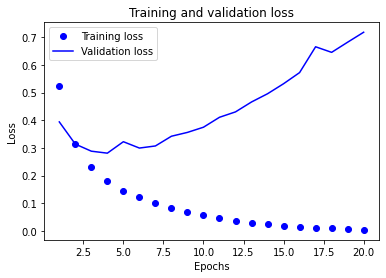

In [21]:
import matplotlib.pyplot as plt


def print_train_val_loss(history_dict):
    plt.clf()
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


print_train_val_loss(history.history)

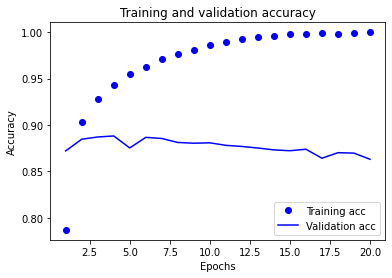

In [22]:
def print_train_val_acc(history_dict):
    plt.clf()
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(val_acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


print_train_val_acc(history.history)

In [16]:
# 从头训练一个新的模型
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4572 - accuracy: 0.8210
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2638 - accuracy: 0.9075
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1979 - accuracy: 0.9289
Epoch 4/4
782/782 [==============================] - 1s 897us/step - loss: 0.3216 - accuracy: 0.8733


In [18]:
print(results)
model.predict(x_test)

[0.3216167092323303, 0.8732799887657166]


array([[0.13078621],
       [0.999383  ],
       [0.71722126],
       ...,
       [0.08053625],
       [0.03146881],
       [0.52414954]], dtype=float32)

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5269 - accuracy: 0.7811 - val_loss: 0.4386 - val_accuracy: 0.8191
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3047 - accuracy: 0.9027 - val_loss: 0.2979 - val_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2146 - accuracy: 0.9269 - val_loss: 0.2778 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1639 - accuracy: 0.9426 - val_loss: 0.2835 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1265 - accuracy: 0.9598 - val_loss: 0.3003 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1024 - accuracy: 0.9688 - val_loss: 0.3176 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0803 - accuracy: 0.9758 - val_loss: 0.3395 - val_accuracy: 0.8832
Epoch 8/20
30

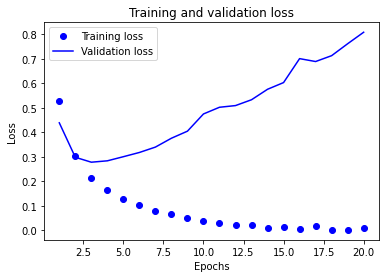

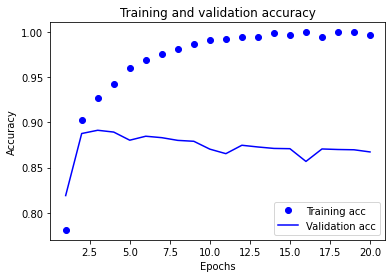

782/782 [==============================] - 1s 954us/step - loss: 0.8935 - accuracy: 0.8512


In [26]:
# 使用三个隐藏层的新模型, 发现在epochs=2的时候效果最好
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
print_train_val_loss(history.history)
print_train_val_acc(history.history)
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4869 - accuracy: 0.7887 - val_loss: 0.3460 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2690 - accuracy: 0.9055 - val_loss: 0.2916 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1992 - accuracy: 0.9283 - val_loss: 0.2993 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1529 - accuracy: 0.9471 - val_loss: 0.3083 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1221 - accuracy: 0.9598 - val_loss: 0.3223 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0960 - accuracy: 0.9700 - val_loss: 0.3226 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0815 - accuracy: 0.9729 - val_loss: 0.3533 - val_accuracy: 0.8766
Epoch 8/20
30

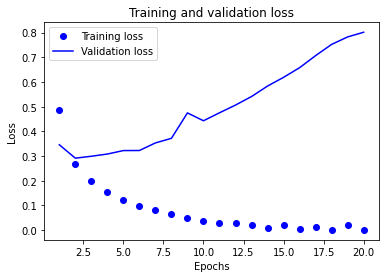

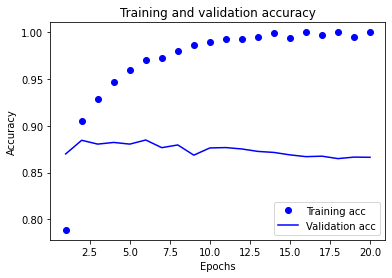

782/782 [==============================] - 1s 896us/step - loss: 0.8751 - accuracy: 0.8509
[0.8750860095024109, 0.8509200215339661]


In [27]:
# 使用32个隐藏单元,过拟合发生很快
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
print_train_val_loss(history.history)
print_train_val_acc(history.history)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1675 - accuracy: 0.7925 - val_loss: 0.1178 - val_accuracy: 0.8745
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0902 - accuracy: 0.9079 - val_loss: 0.0976 - val_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0657 - accuracy: 0.9303 - val_loss: 0.0856 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0512 - accuracy: 0.9467 - val_loss: 0.0826 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0416 - accuracy: 0.9570 - val_loss: 0.0842 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0342 - accuracy: 0.9664 - val_loss: 0.0833 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0276 - accuracy: 0.9727 - val_loss: 0.0962 - val_accuracy: 0.8711
Epoch 8/20
30

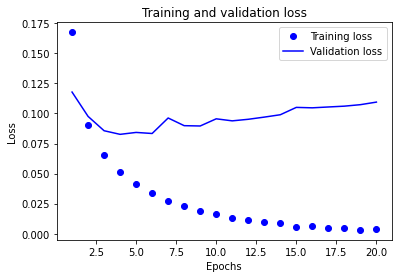

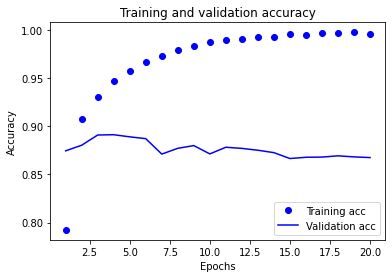

782/782 [==============================] - 1s 904us/step - loss: 0.1227 - accuracy: 0.8505


In [28]:
# 使用mse损失函数替代binary_crossentropy
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
print_train_val_loss(history.history)
print_train_val_acc(history.history)
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4970 - accuracy: 0.7937 - val_loss: 0.3639 - val_accuracy: 0.8748
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2817 - accuracy: 0.9063 - val_loss: 0.2875 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1975 - accuracy: 0.9320 - val_loss: 0.2714 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1500 - accuracy: 0.9490 - val_loss: 0.2766 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1152 - accuracy: 0.9613 - val_loss: 0.2991 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0885 - accuracy: 0.9715 - val_loss: 0.3545 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0687 - accuracy: 0.9784 - val_loss: 0.4053 - val_accuracy: 0.8695
Epoch 8/20
30

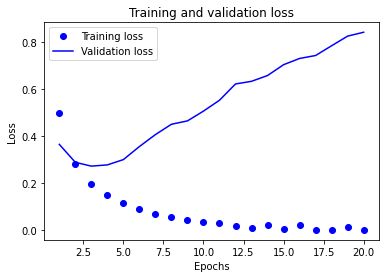

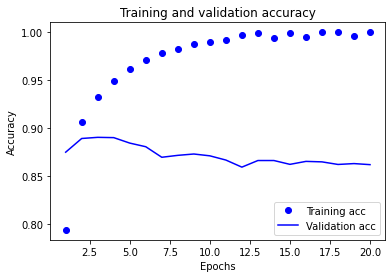

782/782 [==============================] - 1s 852us/step - loss: 0.9411 - accuracy: 0.8459


In [29]:
# 使用tanh替代relu
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
print_train_val_loss(history.history)
print_train_val_acc(history.history)
results = model.evaluate(x_test, y_test)